Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [19]:
import itertools
import random
from collections import Counter
import re
import string

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [32]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [33]:
type(df_zoo.animal)

pandas.core.series.Series

2 - Transforme os campos booleanos "True"/"False" em strings "T/F"  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)  

Obs: O Pandas já inferiu que as variáveis originais são de tipo booleano, mas como você faria se não o fossem; se fossem strings, por exemplo?  

In [34]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [35]:
df_zoo.hair = df_zoo.hair.apply(lambda x:str(x))
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [6]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(14), int64(1), object(3)
memory usage: 4.6+ KB


In [7]:
df_zoo.feathers = df_zoo.feathers.map({True:'Verdadeiro',False:'Falso'})
df_zoo[0:10]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,Falso,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,Falso,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
7,carp,False,Falso,True,False,False,True,False,True,True,False,False,True,0,True,True,False,fish
8,catfish,False,Falso,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
9,cavy,True,Falso,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal


In [8]:
booleanas = df_zoo.loc[:, df_zoo.dtypes == bool].columns
df_zoo[booleanas].head()

,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
0,False,True,False,False,True,True,True,True,False,False,False,False,True
1,False,True,False,False,False,True,True,True,False,False,True,False,True
2,True,False,False,True,True,True,True,False,False,True,True,False,False
3,False,True,False,False,True,True,True,True,False,False,False,False,True
4,False,True,False,False,True,True,True,True,False,False,True,False,True


In [9]:
df_zoo[booleanas] = df_zoo[booleanas].applymap(lambda x: int(x))
df_zoo

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,Falso,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,True,Falso,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,False,Falso,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,True,Falso,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,True,Falso,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
5,buffalo,True,Falso,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
6,calf,True,Falso,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammal
7,carp,False,Falso,1,0,0,1,0,1,1,0,0,1,0,1,1,0,fish
8,catfish,False,Falso,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
9,cavy,True,Falso,0,1,0,0,0,1,1,1,0,0,4,0,1,0,mammal


In [10]:
df_zoo[booleanas] = df_zoo[booleanas].applymap(lambda x: "Verdadeiro" if x == 1 else "Falso")
df_zoo

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
1,antelope,True,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
2,bass,False,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,Verdadeiro,0,Verdadeiro,Falso,Falso,fish
3,bear,True,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
4,boar,True,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
5,buffalo,True,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
6,calf,True,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Verdadeiro,Verdadeiro,mammal
7,carp,False,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Verdadeiro,Verdadeiro,Falso,Falso,Verdadeiro,0,Verdadeiro,Verdadeiro,Falso,fish
8,catfish,False,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,Verdadeiro,0,Verdadeiro,Falso,Falso,fish
9,cavy,True,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Verdadeiro,Falso,mammal


In [12]:
df_zoo.loc[:2,['animal','hair']]

,animal,hair
0,aardvark,True
1,antelope,True
2,bass,False


In [16]:
df_zoo.iloc[0:2,0:2]

,animal,hair
0,aardvark,True
1,antelope,True


3 - Crie um novo dataframe somente com os Mamíferos

In [36]:
df_zoo[df_zoo.type == 'mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

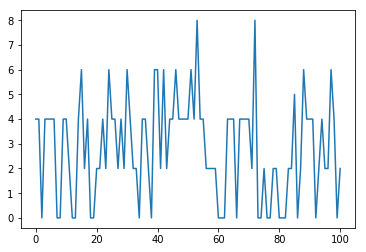

In [37]:
df_zoo.legs.plot()

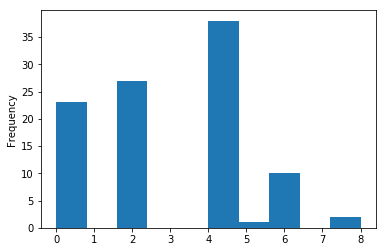

In [38]:
df_zoo.legs.plot(kind='hist')

In [40]:
df_zoo[df_zoo.legs == 5]['animal']

85    starfish
Name: animal, dtype: object

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [41]:
conn = sqlite3.connect('tabela_zoo')

In [42]:
df_zoo.to_sql('tabela_zoo', con=conn)

In [43]:
cur = conn.cursor()

In [44]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('tabela_zoo',)]


In [45]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 'True', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 'True', 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 'False', 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 'True', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 'True', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 'True', 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 'True', 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 'False', 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 'False', 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 'True', 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 'True', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 'False', 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [46]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", conn)
new_df.head()

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,True,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,antelope,True,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,2,bass,False,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,3,bear,True,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,4,boar,True,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [15]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | sort -u | uniq | sed 10q


]
a
A
ab
abafadas
abafado
abafando
abafava
abahuladas
uniq: write error: Broken pipe


In [16]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | sort -u | uniq -i | sed 10q


]
a
ab
abafadas
abafado
abafando
abafava
abahuladas
abaixo
uniq: write error: Broken pipe


In [2]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -ci

      1 
      1 ]
   2999 a
      2 acaba
      1 saiba
      1 amba
      1 emba
      1 barba
      1 Corityba
      9 ca
      1 fraca
      1 casaca
      1 sobrecasaca
     16 ressaca
      1 pataca
      4 vacca
      3 secca
     36 bocca
      2 rabeca
      2 Bibliotheca
      1 boneca
      1 dedica
      1 fatidica
      2 indica
     23 fica
      1 significa
      1 gratifica
      1 scientifica
      1 justifica
      2 logica
      1 seraphica
      1 philosophica
      1 encyclica
      2 catholica
      1 plica
      1 treplica
     17 explica
      6 polemica
      1 astronomica
      7 Monica
      7 unica
      1 communica
      1 rica
      1 America
      1 Rhetorica
      1 tisica
     12 musica
      1 physica
      2 metaphysica
      2 dramatica
      4 pratica
      1 prophetica
      1 arithmetica
      1 poetica
      7 politica
      1 critica
      1 identica
      1 botica
     10 ecclesiastica
      1 fantastica
      2 mystica
      2 therapeutica
   

      1 contara
      1 captara
      1 importara
      4 taquara
      8 vara
      1 deixara
     29 bra
     10 abra
      1 cabra
      1 quebra
     34 lembra
      1 Alembra
      6 sombra
     12 obra
      1 quadra
      5 pedra
      1 vidra
    554 era
      2 recebera
      1 ibera
      1 fallecera
      1 apparecera
      2 esquecera
      3 sincera
      1 Nascera
     10 dera
      1 succedera
      2 considera
      1 apprendera
      1 entendera
      2 modera
      2 perdera
      2 gera
      3 exagera
      2 viera
      1 lera
      3 colera
      2 venera
      1 remunera
     16 opera
      7 espera
     21 vespera
      1 prospera
      1 occorrera
      1 morrera
      1 madurera
      5 dissera
      2 altera
      1 austera
      1 mettera
      1 escrevera
      3 tivera
      6 estivera
      1 vivera
      1 resolvera
      1 houvera
     10 fizera
      7 quizera
     34 gra
      1 magra
      1 sagra
      1 alegra
      7 regra
      1 sogra
      4 de

      1 queixe
      6 trouxe
      3 treze
      1 Dize
     14 quinze
      4 onze
      1 bronze
      1 doze
      6 quatorze
     82 f
     12 caf
      2 pglaf
      1 Chief
      1 staff
     22 if
    123 of
      1 arruf
     11 g
      1 affag
      2 pag
      2 rapag
      3 cheg
      1 Peg
      2 preg
      2 vig
      1 reading
      1 downloading
      4 providing
      1 sending
      8 including
      1 reaching
      2 anything
      2 linking
      1 mailing
      3 performing
      1 remaining
      2 obtaining
      1 maintaining
      1 containing
      1 beginning
      2 concerning
      2 keeping
      1 appearing
      1 sharing
      1 ensuring
      1 increasing
      1 processing
      6 using
      1 indicating
      4 creating
      1 regulating
      3 writing
      2 promoting
      1 accepting
      1 exporting
      7 distributing
      2 redistributing
      1 receiving
      1 viewing
      3 following
      4 displaying
      2 paying
      3 com

      2 sommando
      2 tomando
      1 armando
      1 formando
      3 scismando
      1 emplumando
      2 acostumando
      1 abanando
      1 enganando
      1 ordenando
      1 reinando
      1 imaginando
      1 examinando
      1 ensinando
      2 alternando
      3 tornando
      2 oando
      1 apregoando
      1 papando
      1 chupando
      1 poupando
      2 parando
      1 preparando
      1 amparando
      1 comparando
      1 sarando
      1 brando
      4 lembrando
      1 considerando
      1 temperando
      8 esperando
      1 alterando
      1 pairando
      1 cheirando
      5 mirando
      3 suspirando
      2 tirando
      6 chorando
      2 morando
      1 namorando
      2 demorando
      1 comprando
      1 empurrando
      4 entrando
      1 segurando
      2 murmurando
      1 apurando
      3 casando
      1 pesando
      1 pisando
      9 pensando
      3 conversando
      5 passando
      1 cessando
      2 confessando
      1 achatando
      1 matando

      1 throughout
      8 without
      1 hypertext
      1 txt
      9 u
      4 mau
      6 pau
      2 degrau
      1 embu
      2 execu
    531 eu
      1 bebeu
      5 recebeu
     65 ceu
      2 padeceu
      5 agradeceu
      1 obedeceu
      1 envelheceu
      3 amanheceu
      3 conheceu
      1 desconheceu
      1 estabeleceu
      1 desvaneceu
     13 pareceu
      4 appareceu
      5 desappareceu
      3 offereceu
      1 mereceu
      1 escureceu
      1 aconteceu
      6 esqueceu
      3 venceu
      3 nasceu
      2 desceu
      1 cresceu
     49 deu
      4 cedeu
      6 succedeu
      1 concedeu
      4 accendeu
      2 reprehendeu
      1 suspendeu
      2 rendeu
      5 apprendeu
      3 entendeu
      3 estendeu
      2 attendeu
      1 Vendeu
     25 respondeu
      7 perdeu
      2 mordeu
      1 camafeu
      1 encheu
      2 recolheu
      1 tolheu
      2 lieu
      1 leu
      4 valeu
      1 releu
    169 meu
      1 tremeu
      3 doeu
      1 chapeu
      

2 - Quantas palavras maiúsculas distintas há no texto?

In [24]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep '^[A-Z]' | sort -u | wc -l

1499


3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

In [25]:
!cat ../Dados/DomCasmurroMachadoAssis.txt |  tr -sc '[A-Z][a-z]' '[\012*]'| grep -i "^[^aeiou]*[aeiou]\{1\}[^aeiou]*$" | wc -l

27343


In [26]:
!cat ../Dados/DomCasmurroMachadoAssis.txt |  tr -sc '[A-Z][a-z]' '[\012*]'| grep -i "^[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*$" | wc -l

22958


In [27]:
!cat ../Dados/DomCasmurroMachadoAssis.txt |  tr -sc '[A-Z][a-z]' '[\012*]'| grep -i "^[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*$" | wc -l

12556


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [ ]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' > ../Dados/Dom_words.txt
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | tail  -n +2 > ../Dados/Dom_nextwords.txt
!paste ../Dados/Dom_words.txt ../Dados/Dom_nextwords.txt| sort | uniq -c | sort -nr

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando [Python](https://docs.python.org/3/library/re.html)

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [ ]:
with open('../Dados/DomCasmurroMachadoAssis.txt') as f:
    texto = f.read()
texto

In [ ]:
texto1 = texto.split()
texto2 = [x.strip(string.punctuation) for x in texto1]
texto3 = list(set(texto22))
texto3.pop(0)
texto4= [x for x in texto3 if not x[0].isnumeric()]
rima = [x[::-1] for x in texto4]
ordem1 = sorted(texto4,key=ascii)
ordem2 = sorted(texto4)
ordem3 = sorted(rima)
ordem3 = [x[::-1] for x in ordem3]

2 - Quantas palavras maiúsculas distintas há no texto?

In [ ]:
len(set(re.findall(r'\b[A-ZÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛÇ]\w*',texto)))

3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

In [ ]:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*\b',texto))

In [ ]:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*\b',texto))

In [ ]:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz]*\b',texto))

### Parte 4 - Bancos de dados

In [ ]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

In [ ]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [ ]:
a = '''select avg(avail_balance), max(avail_balance), min(avail_balance) from account
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [ ]:
a = '''select count(*) from account where avail_balance >
(select avg(avail_balance) from account)
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [ ]:
a = '''(select open_date from account order by open_date asc limit 3)
union all
(select open_date from account order by open_date desc limit 3)
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [ ]:
a = '''select p.product_cd, pt.name from product as p
inner join product_type as pt
on p.product_type_cd = pt.product_type_cd
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

5 - Quantos empregados ("employee") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [ ]:
a = '''(select count(*) from employee where fname like '%e%')
UNION ALL
(select count(*) from employee where lname like '%r')
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

In [ ]:
a = '''select distinct title from employee
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [ ]:
a = '''(select * from employee where superior_emp_id = 1)
union all
select * from employee where superior_emp_id in (select emp_id from employee where superior_emp_id = 1)
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [ ]:
a = '''select product_cd, avg(avail_balance), max(avail_balance), min(avail_balance) from account group by product_cd
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [ ]:
cur.execute('describe transaction')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from transaction')
for r in cur.fetchall():
    print(r)

In [ ]:
a = '''select year(txn_date), count(*) from transaction
group by(year(txn_date))
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [ ]:
a = '''create table automoveis(
carro_id int not null primary key auto_increment,
modelo varchar(255) not null
);
'''

cur.execute(a)
for r in cur.fetchall():
    print(r)

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [ ]:
cur.execute('describe individual')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from individual')
for r in cur.fetchall():
    print(r)

In [ ]:
a = '''select concat(fname,' ',lname) from individual
'''
L = []

cur.execute(a)
for r in cur.fetchall():
    L.append(str(r[0]))
L

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [ ]:
a = '''select concat(fname,' ',lname), year(birth_date) from individual
'''
L = []

cur.execute(a)
for r in cur.fetchall():
    L.append((str(r[0]),r[1]))
D = dict(L)

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [ ]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [ ]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur2 = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()